In [1]:
!pip install opendatasets
!pip install apyori

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import opendatasets as od

# Loading Dataset

In [3]:
url="https://www.kaggle.com/datasets/devank07/groceries-dataset"

od.download(url)

Skipping, found downloaded files in "./groceries-dataset" (use force=True to force download)


In [4]:
dir = "groceries-dataset"

In [5]:
df = pd.read_csv("./groceries-dataset/Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
df.shape

(38765, 3)

In [7]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [9]:
df.notnull().sum()

Member_number      38765
Date               38765
itemDescription    38765
dtype: int64

In [10]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

## NO MISSING VALUES

In [11]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [12]:
#setting index as Date
df.set_index('Date',inplace = True)

In [13]:
df.head()

,Member_number,itemDescription
Date,,
21-07-2015,1808,tropical fruit
05-01-2015,2552,whole milk
19-09-2015,2300,pip fruit
12-12-2015,1187,other vegetables
01-02-2015,3037,whole milk


In [14]:
#converting date into a particular format
df.index=pd.to_datetime(df.index)

<ipython-input-14-195e44b49bef>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.index=pd.to_datetime(df.index)


In [15]:
df.head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


In [16]:
df.shape

(38765, 2)

In [17]:
#gathering information about products
total_item = len(df)
total_days = len(np.unique(df.index.date))
total_months = len(np.unique(df.index.year))
print(total_item,total_days,total_months)

38765 728 2


### Total 38765 items sold in 728 days throughout 24 months

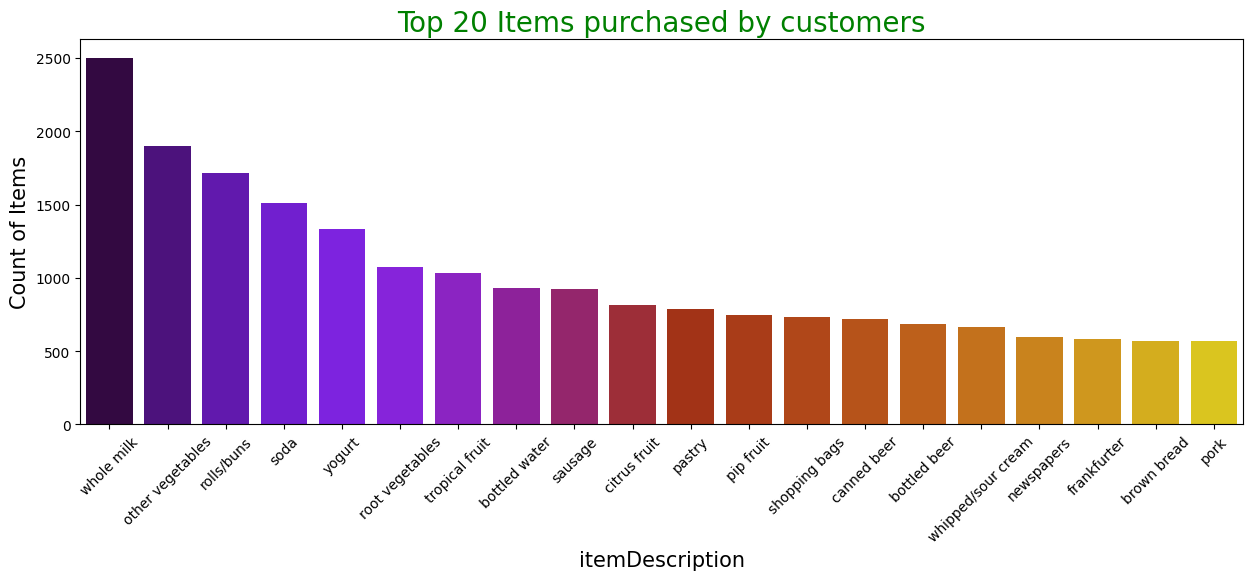

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.itemDescription.value_counts().head(20).index, y = df.itemDescription.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('itemDescription', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

In [19]:
df['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [20]:
#grouping dataset to form a list of products bought by same customer on same date
df=df.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))

In [21]:
df.head(10)

Member_number  Date      
1000           2014-06-24                    [whole milk, pastry, salty snack]
               2015-03-15    [sausage, whole milk, semi-finished bread, yog...
               2015-05-27                           [soda, pickled vegetables]
               2015-07-24                       [canned beer, misc. beverages]
               2015-11-25                          [sausage, hygiene articles]
1001           2014-07-02                    [sausage, whole milk, rolls/buns]
               2014-12-12                                   [whole milk, soda]
               2015-01-20              [frankfurter, soda, whipped/sour cream]
               2015-02-05                                  [frankfurter, curd]
               2015-04-14                                  [beef, white bread]
Name: itemDescription, dtype: object

In [22]:
#apriori takes list as an input, hence converting dtaset to a list
transactions = df.values.tolist()
transactions[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

In [23]:
#applying apriori
from apyori import apriori
rules = apriori(transactions, min_support=0.00030,min_confidence = 0.05,min_lift = 2,min_length = 2)
results = list(rules)
results

[RelationRecord(items=frozenset({'soda', 'artif. sweetener'}), support=0.00046782062420637575, ordered_statistics=[OrderedStatistic(items_base=frozenset({'artif. sweetener'}), items_add=frozenset({'soda'}), confidence=0.2413793103448276, lift=2.4857251346797353)]),
 RelationRecord(items=frozenset({'berries', 'condensed milk'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'condensed milk'}), items_add=frozenset({'berries'}), confidence=0.05102040816326531, lift=2.34177413296607)]),
 RelationRecord(items=frozenset({'whole milk', 'brandy'}), support=0.0008688097306689834, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brandy'}), items_add=frozenset({'whole milk'}), confidence=0.34210526315789475, lift=2.1662805978127717)]),
 RelationRecord(items=frozenset({'sweet spreads', 'butter'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sweet spreads'}), items_add=frozenset({'butter'}), confid

In [24]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
ordered_results = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [25]:
ordered_results

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,artif. sweetener,soda,0.000468,0.241379,2.485725
1,condensed milk,berries,0.000334,0.051020,2.341774
2,brandy,whole milk,0.000869,0.342105,2.166281
3,sweet spreads,butter,0.000334,0.073529,2.087705
4,liver loaf,canned beer,0.000401,0.120000,2.557778
...,...,...,...,...,...
99,whipped/sour cream,yogurt,0.000601,0.204545,2.381800
100,sausage,yogurt,0.000401,0.206897,2.409178
101,whole milk,sausage,0.001470,0.131737,2.182917
102,pastry,soda,0.000334,0.090909,7.817659
